# Assignment 2: Linear and logistic regression
### ip222gs

## Exercise 4: Nonlinear logistic regression

In [165]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [166]:
# read csv and save output as numpy array
df = np.loadtxt('microchips.csv', delimiter=',')
df[:5] # print top 5 rows

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [167]:
# Split feature and target arrays from the training dataset
X = df[:, :2]
y = df[:, 2].reshape(-1,1)

### Task 1. Plot the data in X and y using different symbols or colors for the two different classes

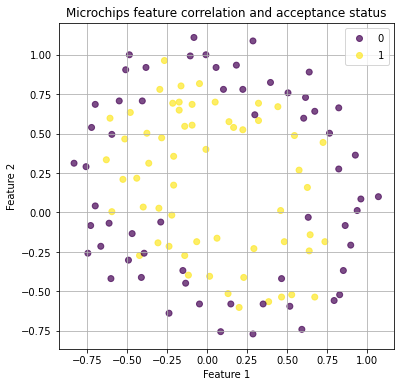

In [168]:
# Plot the dataset

plt.figure(figsize=(6,6))
ax = plt.scatter(x=X[:, 0], y=X[:, 1], c= y, alpha=0.7)
plt.title('Microchips feature correlation and acceptance status')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html
legend = ax.legend_elements() 
plt.legend(*legend)

plt.show()

### Task 2. Use gradient descent to find beta in the case of a quadratic model. <br> Print the hyper parameters and produce plots


In [169]:
# Define function to create extension matrix with polynominal degree "d" from the existing matrix
# Use code provided in lecture "Logistic Regression" p.22

def mapFeature(x1,x2,d):
    n = x1.shape[0]
    Xe = np.c_[np.ones((n,1)), x1, x2]
    for i in range(2, d+1):
        for j in range(0,i+1):
            Xnew = x1**(i-j)*x2**j 
            Xnew = Xnew.reshape(-1,1)
            Xe = np.append(Xe, Xnew, axis=1)
    return Xe

# Compute the extended matrix Xe of normalized matrix
Xe = mapFeature(X[:,0],X[:,1], 2)

In [170]:
# Define sigmoid function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [171]:
# Define cost function:

def cost_function(b):
    J = -1/n*(y.T.dot(np.log(sigmoid(np.dot(Xe, b)))) + (1-y).T.dot(np.log(1 - sigmoid(np.dot(Xe, b)))))
    return J

In [172]:
L = 5  # The learning Rate
iterations = 1000  # The number of iterations to perform gradient descent

# define inital betas
beta = np.zeros((6,1))
#define empty array for plotting
cost = np.zeros([iterations, 2])

n = Xe.shape[0]

# Performing Gradient Descent 
for i in range(iterations): 
    beta = beta - L/n*(Xe.T.dot(sigmoid(np.dot(Xe, beta)) - y))
    #Cost function:
    J = cost_function(beta)
    cost[i, :] = np.c_[J, i]
print(f'Cost function at learning rate of {L} and number of iterations of {iterations} is equal to {round(J[0,0],4)}')

Cost function at learning rate of 5 and number of iterations of 1000 is equal to 0.3481


In [173]:
# Count training error and round to sigle digit
predicted_values = np.round(sigmoid(np.dot(Xe, beta)))
training_error = np.sum(np.not_equal(predicted_values, y))

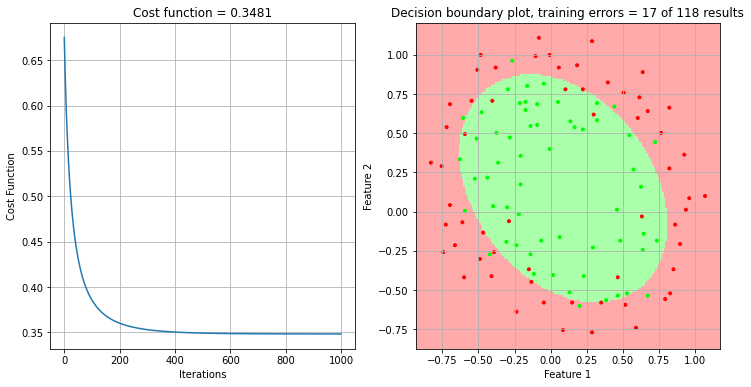

In [174]:
# Define boundaries for plot
# Using code provided in lecture "Logistic regression", p.21

# step size in the mesh
h = .01 
# define borders
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

# create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Mesh Grid

X1, X2 = xx.reshape(-1,1), yy.reshape(-1,1) # Turn to two Nx1 arrays
XXe = mapFeature(X1, X2, 2) # Extend matrix for degree 2
p = sigmoid(np.dot(XXe, beta)) # classify mesh ==> probabilities
classes = p>0.5 # round off probabilities
clz_mesh = classes.reshape(xx.shape) # return to mesh format
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00']) # colors


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axs[0].plot(cost[:, 1], cost[:, 0])
axs[0].set(xlabel = 'Iterations')
axs[0].set(ylabel = 'Cost Function')
axs[0].set(title = f'Cost function = {round(J[0,0],4)}')
axs[0].grid()

axs[1].pcolormesh(xx, yy, clz_mesh, cmap=cmap_light, shading='auto')
axs[1].scatter(x=X[:, 0], y=X[:, 1], c= y, marker='.', cmap=cmap_bold)
axs[1].set(xlabel = 'Feature 1')
axs[1].set(ylabel = 'Feature 2')
axs[1].set(title = f'Decision boundary plot, training errors = {training_error} of {len(y)} results')
axs[1].grid()

plt.show()

### Task 3. Polynomial expressions of the features in logistic regression

In [179]:
# Implement a method called mapFeatures.

# Define function to create extension matrix with polynominal degree "d" from the existing matrix
# Use code provided in lecture "Logistic Regression" p.22

# Function has already been created in step 1 of Task 2, repeating below

def mapFeature(x1,x2,d):
    n = x1.shape[0]
    Xe = np.c_[np.ones((n,1)), x1, x2]
    for i in range(2, d+1):
        for j in range(0,i+1):
            Xnew = x1**(i-j)*x2**j 
            Xnew = Xnew.reshape(-1,1)
            Xe = np.append(Xe, Xnew, axis=1)
    return Xe
    
Xe = mapFeature(X[:,0],X[:,1], 2)
Xe[:1]

array([[1.        , 0.051267  , 0.69956   , 0.00262831, 0.03586434,
        0.48938419]])

### Task 4. Use mapFeatures to repeat task 3 but with a polynomial of degree 5 model.

In [180]:
Xe_5 = mapFeature(X[:,0],X[:,1], 5)
Xe_5[:1]

array([[1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
        3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
        2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
        1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
        4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
        1.67542444e-01]])